In this notebook, I explore how Singular Value Decomposition helps to reduce the dimensionality of an image, where we are still keeping most information.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from numpy import linalg as LA
from matplotlib import pyplot as plt
plt.show()
from PIL import Image
import matplotlib
import matplotlib.image as image


In [2]:
img=Image.open("/Users/elzbietapolak/Desktop/ML/test_image.png") 

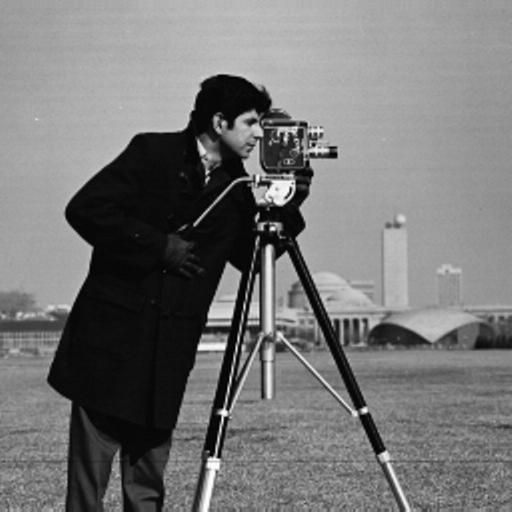

In [3]:
img

Creating a matrix for the given image:

In [4]:
imageMat=np.array(list(img.getdata(band=0)), float)
imageMat.shape = (img.size[0], img.size[1])

Computing the singular value decomposition of imageMat:

In [5]:
U, sigma, V = np.linalg.svd(imageMat)

Reconstructing image with a top singular value: The image is unrecognizable:

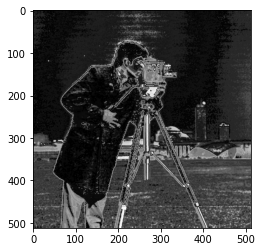

In [6]:
firstSing = np.matrix(U[:, :3000]) * np.diag(sigma[:3000]) * np.matrix(V[:3000, :])
plt.imshow(firstSing, cmap='gray');

Now I use four top singular values:

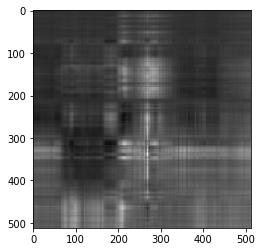

In [7]:
fourSing = np.matrix(U[:, :4]) * np.diag(sigma[:4]) * np.matrix(V[:4, :])
plt.imshow(fourSing, cmap='gray');

Above we see a picture emerge. At this point I will iterate to obtain pictures for 14, 24 and 34 singular values:

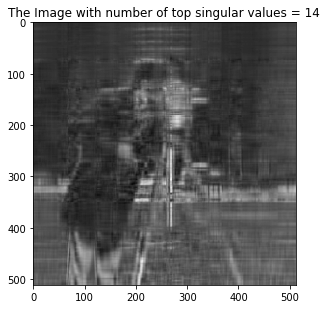

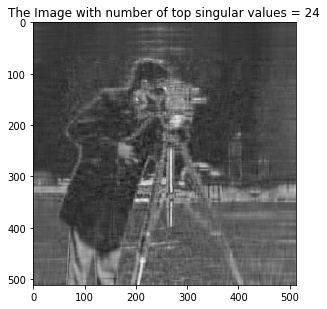

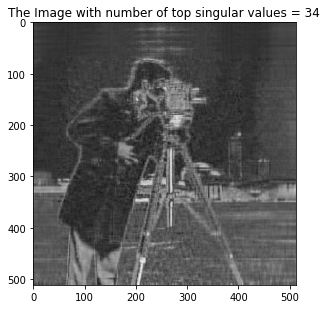

In [8]:
numberComps=[14,24,34]
for i in range(len(numberComps)):
    CompressedImage=np.matrix(U[:, :numberComps[i]]) * np.diag(sigma[:numberComps[i]]) * np.matrix(V[:numberComps[i], :])
   # if(i == 0): 
    #    plt.subplot(1,3,14+10*()), 
    #    plt.imshow(CompressedImage, cmap='gray'), 
    #    plt.title(f'Actual Image')   
   # else: 
    plt.figure(figsize = (16,8))
    plt.subplot(1,3,i+1),
    plt.imshow(CompressedImage, cmap='gray'), 
    plt.title(f'The Image with number of top singular values = {numberComps[i]}')

Now I compare the Frobenius norm of all matrices involved; this is a good measure of expressing the compression:

In [9]:
# Listing all Frobenius norms:
print(LA.norm(imageMat, 'fro'), 'Frobenius norm of the full matrix')
print(LA.norm(firstSing, 'fro'), 'corresponding to top sing value')
print(LA.norm(fourSing, 'fro'),'corresponding to top 4 sing values')
print(LA.norm(np.matrix(U[:, :numberComps[0]]) * np.diag(sigma[:numberComps[0]]) * np.matrix(V[:numberComps[0], :]), 'fro'),'corresponding to top 14 sing values')
print(LA.norm(np.matrix(U[:, :numberComps[1]]) * np.diag(sigma[:numberComps[1]]) * np.matrix(V[:numberComps[1], :]), 'fro'),'corresponding to top 24 sing values')
print(LA.norm(np.matrix(U[:, :numberComps[2]]) * np.diag(sigma[:numberComps[2]]) * np.matrix(V[:numberComps[2], :]), 'fro'),'corresponding to top 34 sing values')


17231.869080282613 Frobenius norm of the full matrix
17231.869080282613 corresponding to top sing value
15220.923084152406 corresponding to top 4 sing values
16004.612588131673 corresponding to top 14 sing values
16307.973710647198 corresponding to top 24 sing values
16490.140150752864 corresponding to top 34 sing values


For example, with fourteen top singular values, the image is discernible, but we only have 92.9% of the Frobenius norm of the original image.